In [1]:
import numpy as np
#import pandas as pd
from keras.callbacks import ModelCheckpoint
#from tensorflow.keras.callbacks import ModelCheckpoint

from keras.callbacks import EarlyStopping, ModelCheckpoint

import keras
import keras.backend as K
import tensorflow as tf
from keras import applications
from keras.models import Model
from keras.layers import Flatten, Dense, Input,concatenate,Conv2D,Dropout,GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import load_model, model_from_json
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from keras.applications.inception_resnet_v2 import InceptionResNetV2
import os

Using TensorFlow backend.


In [7]:
img_h=224
img_w=224

base_model = InceptionResNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x =  (Dropout(0.15))(x)
predictions = Dense(2, activation='sigmoid')(x)

model = Model(base_model.input, predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary() .

SyntaxError: invalid syntax (<ipython-input-12-474e0d202806>, line 1)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)
#this will rescale the images by 1/255

# **RE RUN THE CELL ( 2/ 3 TIMES) IF YOU DO NOT GET 11965 IN EACH DIRECTORY**

In [5]:
img_h=224
img_w=224

train_generator = train_datagen.flow_from_directory(
#     directory="./Data/SplittedData/Train",
    directory= "dataset/Train",
    target_size=(img_h,img_w),
    color_mode="rgb",
    batch_size=32,
    #class_mode="categorical",
    shuffle=True,
#    subset='training'
    #seed=42
)

validation_generator = test_datagen.flow_from_directory(
    directory="dataset/Validation",
    target_size=(img_h,img_w),
    color_mode="rgb",
    batch_size=16,
   # class_mode="categorical",
    shuffle=False
)


Found 142569 images belonging to 2 classes.
Found 26548 images belonging to 2 classes.


In [10]:
checkpointer = ModelCheckpoint(filepath='Checkpoints\weights.hdf5', monitor='val_loss',verbose=1, save_best_only=True)

history=model.fit_generator(
                generator=train_generator,
                steps_per_epoch=train_generator.n//train_generator.batch_size,
                 validation_data=validation_generator,
                 validation_steps=validation_generator.n//validation_generator.batch_size,
                epochs=10,
                callbacks=[checkpointer])


Epoch 1/10
4455/4455 [==============================] - 3112s 698ms/step - loss: 0.1975 - acc: 0.9264 - val_loss: 0.4681 - val_acc: 0.8255

Epoch 00001: val_loss improved from inf to 0.46806, saving model to Checkpoints\weights.hdf5
Epoch 2/10
4455/4455 [==============================] - 3078s 691ms/step - loss: 0.1077 - acc: 0.9609 - val_loss: 0.4909 - val_acc: 0.8917

Epoch 00002: val_loss did not improve from 0.46806
Epoch 3/10
4455/4455 [==============================] - 3081s 692ms/step - loss: 0.0773 - acc: 0.9718 - val_loss: 0.5075 - val_acc: 0.8772

Epoch 00003: val_loss did not improve from 0.46806
Epoch 4/10
4455/4455 [==============================] - 3080s 691ms/step - loss: 0.0629 - acc: 0.9774 - val_loss: 0.5459 - val_acc: 0.8729

Epoch 00004: val_loss did not improve from 0.46806
Epoch 5/10
4455/4455 [==============================] - 3081s 691ms/step - loss: 0.0536 - acc: 0.9804 - val_loss: 0.6346 - val_acc: 0.8742

Epoch 00005: val_loss did not improve from 0.46806
Epo

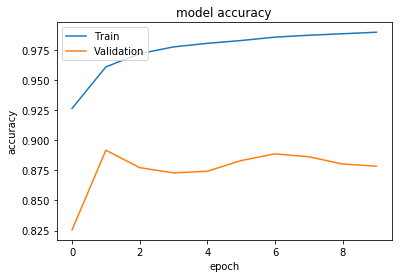

In [11]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

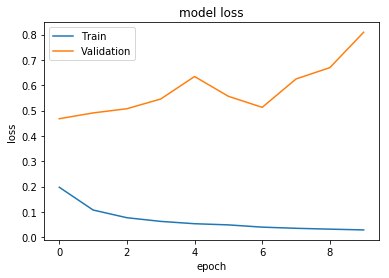

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
model.summary() .

SyntaxError: invalid syntax (<ipython-input-9-474e0d202806>, line 1)

In [19]:
model.load_weights('Checkpoints\weights.hdf5')

In [ ]:
# img_h=224
# img_w=224

# initial_model = applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(img_h,img_w,3))
# x = initial_model.output

# for layer in initial_model.layers:
#     layer.trainable = False
    
    
# # x = Conv2D(128, kernel_size=3, strides=1, activation='relu')(last)
# # x = Conv2D(64, kernel_size=3, strides=1, activation='relu')(x)
# x = Flatten()(x) 
# # x = Dense(512, activation='relu')(x)
# # x = Dense(256, activation='relu')(x)
# #x= GlobalMaxPooling2D()(x)
# #x = Dense(128, activation='relu')(x)
# #x =  (Dropout(0.1))(x)
# preds = Dense(2, activation='sigmoid')(x)

# model = Model(initial_model.input, preds)

# #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.save_weights('weights__sampledata_1st_10Epochs.h5')

In [ ]:
model.load_weights('Checkpoints\weights.hdf5')

In [ ]:
checkpointer2 = ModelCheckpoint(filepath='Checkpoints\weights.hdf5', monitor='val_loss',verbose=1, save_best_only=True)

for layer in base_model.layers:
    layer.trainable = True

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history2=model.fit_generator(
                generator=train_generator,
                steps_per_epoch=train_generator.n//train_generator.batch_size,
                 validation_data=validation_generator,
                 validation_steps=validation_generator.n//validation_generator.batch_size,
                epochs=15,
                callbacks=[checkpointer2]  )


Epoch 1/15
1697/4455 [==========>...................] - ETA: 1:55:28 - loss: 0.0209 - acc: 0.9929

In [24]:
for layer in initial_model.layers:
    layer.trainable = True

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history2=model.fit_generator(
                generator=train_generator,
                steps_per_epoch=train_generator.n//train_generator.batch_size,
                 validation_data=validation_generator,
                 validation_steps=validation_generator.n//validation_generator.batch_size,
                epochs=15,
                callbacks=[checkpointer2]  )

Epoch 1/15
4455/4455 [==============================] - 2883s 647ms/step - loss: 0.2119 - acc: 0.9208 - val_loss: 0.4521 - val_acc: 0.8454

Epoch 00001: val_loss improved from 0.54228 to 0.45206, saving model to Checkpoints\weights.hdf5
Epoch 2/15
4455/4455 [==============================] - 2865s 643ms/step - loss: 0.1449 - acc: 0.9457 - val_loss: 0.4707 - val_acc: 0.8295

Epoch 00002: val_loss did not improve from 0.45206
Epoch 3/15
4455/4455 [==============================] - 2867s 644ms/step - loss: 0.1063 - acc: 0.9608 - val_loss: 0.4818 - val_acc: 0.8491

Epoch 00003: val_loss did not improve from 0.45206
Epoch 4/15
4455/4455 [==============================] - 2868s 644ms/step - loss: 0.0851 - acc: 0.9687 - val_loss: 0.4910 - val_acc: 0.8622

Epoch 00004: val_loss did not improve from 0.45206
Epoch 5/15
4455/4455 [==============================] - 2866s 643ms/step - loss: 0.0680 - acc: 0.9743 - val_loss: 0.5603 - val_acc: 0.8655

Epoch 00005: val_loss did not improve from 0.45206

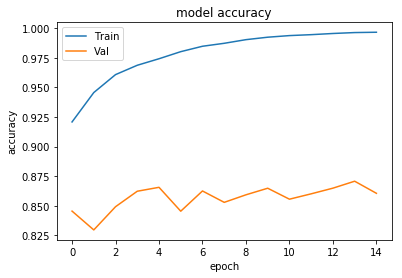

In [25]:
import keras
from matplotlib import pyplot as plt
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

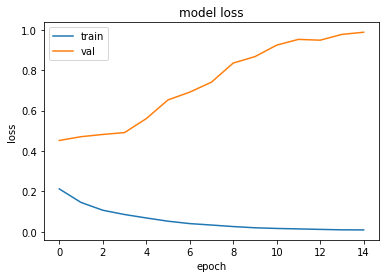

In [26]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('FakeFace_Jan4weights_2nd_35Epochs.h5')

In [27]:
from keras.models import load_model
# Creates a HDF5 file 'my_model.h5'
model.save('FakeFace_Jan27.h5')

In [ ]:
model = load_model('FakeFace_Dec18.h5')

In [ ]:
# import tensorflow as tf
Y_pred = model.predict_generator(classgenerator, steps= (classgenerator.n // classgenerator.batch_size)+1 )

In [ ]:
Y_pred= model.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print("loss             "+"       accuracy"+"             "+"    f1"+"             "+"     precision"+"             "+" recall")
print(Y_pred)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory="Data\Test",
    target_size=(img_h,img_w),
    color_mode="rgb",
    batch_size=16,
   # class_mode="categorical",
    shuffle=False
)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Confution Matrix and Classification Report
classgenerator =test_generator
classgenerator.reset()
Y_pred = model.predict_generator(classgenerator, steps= (classgenerator.n // classgenerator.batch_size)+1 )

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

print(confusion_matrix(classgenerator.classes, y_pred))

print('Classification Report')

target_names = ['Altered', 'Real']

print(classification_report(classgenerator.classes, y_pred, target_names=target_names))



In [ ]:

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

print("F1")
print(" ")
print(f1_score(classgenerator.classes, y_pred , average=None))
print(f1_score(classgenerator.classes, y_pred , average="macro"))
print(f1_score(classgenerator.classes, y_pred , average="micro"))

print(" ")
print("Precision")
print(" ")
print(precision_score(classgenerator.classes, y_pred , average=None))
print(precision_score(classgenerator.classes, y_pred , average="macro"))
print(precision_score(classgenerator.classes, y_pred , average="micro"))

print(" ")
print("Recall")
print(" ")
print(recall_score(classgenerator.classes, y_pred , average=None))
print(recall_score(classgenerator.classes, y_pred , average="macro"))
print(recall_score(classgenerator.classes, y_pred , average="micro"))

In [ ]:
#WRONG !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
from sklearn.metrics import classification_report, confusion_matrix

classgenerator =test_generator

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(classgenerator, (classgenerator.n // classgenerator.batch_size))
#Y_pred= model.predict_generator(test_generator, steps=len(test_generator), verbose=0)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(classgenerator.classes, y_pred))
print('Classification Report')
target_names = ['Altered', 'Real']
print(classification_report(classgenerator.classes, y_pred, target_names=target_names))

In [ ]:
#WRONG !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
print(len(classgenerator))
print(classgenerator.n // classgenerator.batch_size)

In [ ]:
#WRONG !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

from sklearn.metrics import classification_report, confusion_matrix

classgenerator =validation_generator

#Confution Matrix and Classification Report
#Y_pred = model.predict_generator(classgenerator, classgenerator.n // classgenerator.batch_size)
Y_pred= model.predict_generator(test_generator, steps=len(test_generator), verbose=0)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(classgenerator.classes, y_pred))
print('Classification Report')
target_names = ['Altered', 'Real']
print(classification_report(classgenerator.classes, y_pred, target_names=target_names))

In [ ]:
pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=0)
# Get classes by max element in np (as a list)
classes = list(np.argmax(pred, axis=1))


In [ ]:
print(len(classes))

In [ ]:
for layer in model.layers:
    layer.trainable = True

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss=[focal_loss(alpha=.25, gamma=2)], metrics=['accuracy'])
history2=model.fit_generator(
                    generator=train_generator,
                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.n//test_generator.batch_size,
                    epochs=20
)


In [ ]:
model.save('New_model_focalLoss_17Aug_Alpha=0.5,Gamma=2,Epochs=30.h5')

In [ ]:
for layer in model.layers:
    layer.trainable = True

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss=[focal_loss(alpha=.25, gamma=2)], metrics=['accuracy'])
history2=model.fit_generator(
                    generator=train_generator,
                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.n//test_generator.batch_size,
                    epochs=10
)


# **TESTNG WHERE THE MODEL FAILS TO PREDICT**


In [ ]:
model = load_model('final_fingerprintModel.h5',custom_objects={'FocalLoss': focal_loss,'focal_loss_fixed': focal_loss()})

In [ ]:
ls

## **Predicting where the model fails to recognize the REAL images**

In [ ]:
import numpy as np
import cv2
from skimage.transform import resize

def finding_images_REAL():
    type="Real"
    
    for i in range(1,300):
        
        image_number=str(i)
        path="Data/Test2/"+type+"/"+type+ " "+"("+image_number+").BMP"
        img = cv2.imread(path,-1)
        img=resize(img, (img_h, img_w, 3), mode='constant')
        img=img.reshape(img.shape+(1,))
        img=np.transpose(img, (3,0,1 ,2))

        indivisual_prediction=model.predict(img)
        predicted_class_indices=np.argmax(indivisual_prediction,axis=1)


        labels = (train_generator.class_indices)
        labels = dict((v,k) for k,v in labels.items())
        predictions = [labels[k] for k in predicted_class_indices]
        if(predictions[0]!=type):
            print(image_number)

finding_images_REAL()

## **Predicting where the model fails to recognize the FALSE images**

In [ ]:
import numpy as np
import cv2
from skimage.transform import resize

m = 0

def finding_images_Altered():
    
    type="Altered"
    for i in range(1,2460):
        image_number=str(i)
        #path="Indivisual Test/"+type+"/"+type+ " "+"("+image_number+").BMP"
        path="Data\Test2/"+type+"/"+type+ " "+"("+image_number+").BMP"
        #path="Indivisual Test/Altered/Altered(14).BMP"
        img = cv2.imread(path,-1)
        img=resize(img, (img_h, img_w, 3), mode='constant')
        img=img.reshape(img.shape+(1,))
        img=np.transpose(img, (3,0,1 ,2))

        indivisual_prediction=model.predict(img)
        predicted_class_indices=np.argmax(indivisual_prediction,axis=1)


        labels = (train_generator.class_indices)
        labels = dict((v,k) for k,v in labels.items())
        predictions = [labels[k] for k in predicted_class_indices]
        if(predictions[0]!=type):
            print(image_number)
            global m
            m=m+1

finding_images_Altered()

print(m)
  

In [ ]:
model = load_model('FULLY_FINE_TUNED_WITH_50-50_DATASET_April9.h5')

In [ ]:
import numpy as np
import cv2
from skimage.transform import resize


i=13
actual_type='Real'

image_number=str(i)
path="Indivisual Test/"+actual_type+"/"+actual_type+ " "+"("+image_number+").BMP"
img = cv2.imread(path,-1)
img=resize(img, (img_h, img_w, 3), mode='constant')
img=img.reshape(img.shape+(1,))
img=np.transpose(img, (3,0,1 ,2))

individual_prediction=model.predict(img)
predicted_class_indices=np.argmax(individual_prediction,axis=1)
predicted_class_indices

  

import os
# importing io from skimage 
import skimage
from skimage import io
# way to load image from file
file = os.path.join(path) 
myimg = io.imread(file) 
# way to show the input image 
io.imshow(myimg) 
io.show()


if(predicted_class_indices==1):
  print('\n \t Predicted: Real  ||'+'  Actual: '+actual_type+'\n' ) 
else:
  print('\n  \t   Predicted: Altered  ||'+'  Actual: '+actual_type+'\n')

In [ ]:
model = load_model('New_model_focalLoss_15Aug_plus10more_epochs.h5',custom_objects={'FocalLoss': focal_loss,'focal_loss_fixed': focal_loss()})

In [ ]:
for layer in model.layers:
    layer.trainable = True

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss=[focal_loss(alpha=.25, gamma=2)], metrics=['accuracy'])
history2=model.fit_generator(
                    generator=train_generator,
                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.n//test_generator.batch_size,
                    epochs=5
)


In [ ]:
model = load_model('New_model_focalLoss_15Aug_plus10more_epochs.h5',custom_objects={'FocalLoss': focal_loss,'focal_loss_fixed': focal_loss()})

In [ ]:
model.save('25Aug_36KData_Fingerpints.h5')

In [ ]:
model.save('New_model_focalLoss_15Aug_plus10more_epochs.h5')